Enconding
"meningioma": 0

"glioma": 1

"pituitary": 2

In [1]:
# Pre-trained Architecture

# Xception
# InceptionV3
# DenseNet201
# EfficientNet201
# ResNet50V2
# ResNet152V2
# MobileNetV2
# VGG19
# VGG16

# Model with BatchNormalization, early stop, reduce learning rate 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Import VGG19 model from Keras applications
from tensorflow.keras.applications import VGG19

# Import necessary layers from Keras
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

# Import ImageDataGenerator for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Import preprocess_input function for VGG19 model
from tensorflow.keras.applications.vgg19 import preprocess_input

# Import os and cv2 for file operations and image processing
import os
import cv2

# Import additional layers and callbacks from Keras
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam

# Import EarlyStopping callback from TensorFlow Keras
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv("Final_Brain_Tumor_ImagePath_Label.csv")
df.head()

,image_path,label
0,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,0
1,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,0
2,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,0
3,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,0
4,/Users/shyamsonu/Downloads/Brain Tumor Model/F...,0


In [3]:
df.shape

(3064, 2)

In [4]:
df.columns

Index(['image_path', 'label'], dtype='object')

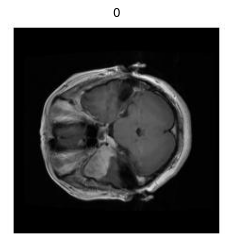

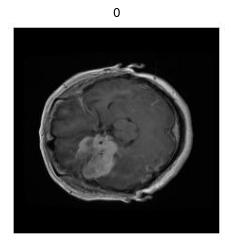

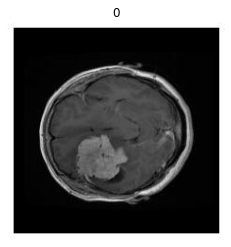

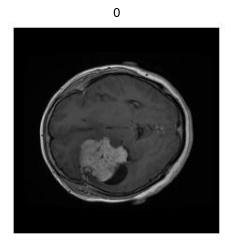

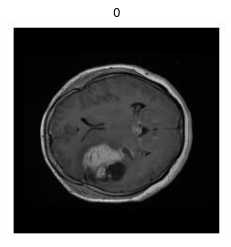

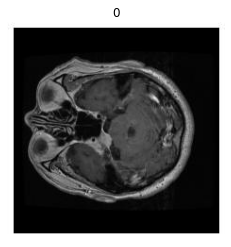

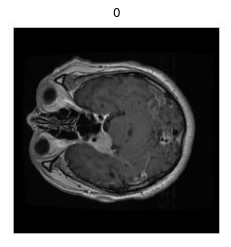

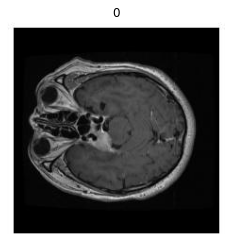

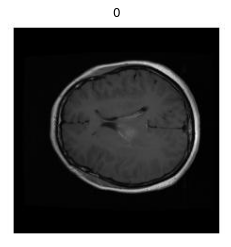

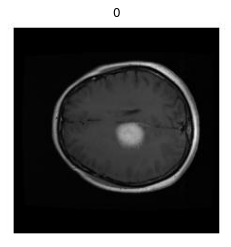

In [5]:
import matplotlib.image as mpimg

# Function to display image and label
def display_image_with_label(image_path, label):
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    plt.show()

# Loop through the first 10 rows of the DataFrame to display images and labels
for index, row in df.head(10).iterrows():
    image_path = row['image_path']
    label = row['label']
    display_image_with_label(image_path, label)

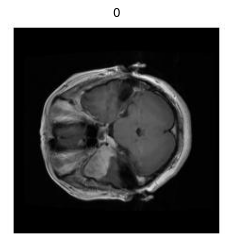

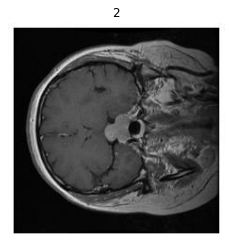

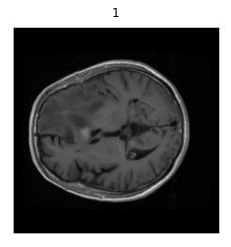

In [6]:
# Function to display image and label
def display_image_with_label(image_path, label):
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    plt.show()

# Filter DataFrame to include only unique labels
unique_labels = df['label'].unique()

# Loop through the DataFrame to display images and labels for unique labels
for label in unique_labels:
    unique_row = df[df['label'] == label].iloc[0]  # Pick the first image for each unique label
    image_path = unique_row['image_path']
    display_image_with_label(image_path, label)

In [7]:
df["label"].value_counts()

label
1    1426
2     930
0     708
Name: count, dtype: int64

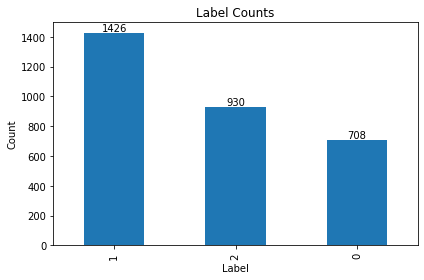

In [8]:
# Plot the counts of each label
ax = df["label"].value_counts().plot(kind='bar')

# Set the plot title and axes labels
plt.title("Label Counts")
plt.xlabel("Label")
plt.ylabel("Count")

# Add the count as text on each bar
for i, count in enumerate(df["label"].value_counts()):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

In [11]:
# Convert the "label" column to string type
df["label"] = df["label"].astype(str)

In [12]:
# Split the data into training and testing sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

# Split the training data into training and validation sets (80% train, 20% validation)
#train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Print the lengths of the resulting datasets
print("Training set length:", len(train_df))
#print("Validation set length:", len(val_df))
print("Testing set length:", len(test_df))

Training set length: 2451
Testing set length: 613


In [13]:
# Perform 5-fold cross-validation on the training set
fold_train_dfs = []
fold_val_dfs = []

for i in range(5):
    fold_train, fold_val = train_test_split(train_df, test_size=0.2, random_state=i)
    fold_train_dfs.append(fold_train)
    fold_val_dfs.append(fold_val)

# Print the lengths of the fold datasets
for i in range(5):
    print("Fold", i+1)
    print("Training set length:", len(fold_train_dfs[i]))
    print("Validation set length:", len(fold_val_dfs[i]))

# Setting the test set as the final evaluation set
evaluation_set = test_df

# Print the length of the evaluation set
print("Evaluation set length:", len(evaluation_set))

Fold 1
Training set length: 1960
Validation set length: 491
Fold 2
Training set length: 1960
Validation set length: 491
Fold 3
Training set length: 1960
Validation set length: 491
Fold 4
Training set length: 1960
Validation set length: 491
Fold 5
Training set length: 1960
Validation set length: 491
Evaluation set length: 613


In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

Fold 1
Found 1960 validated image filenames belonging to 3 classes.
train_generator classes {'0': 0, '1': 1, '2': 2}
Found 491 validated image filenames belonging to 3 classes.
val_generator classes {'0': 0, '1': 1, '2': 2}
Epoch 1/10
62/62 [==============================] - 348s 6s/step - loss: 0.4809 - accuracy: 0.8214 - val_loss: 1.3832 - val_accuracy: 0.5703 - lr: 0.0010
Epoch 2/10
62/62 [==============================] - 355s 6s/step - loss: 0.2041 - accuracy: 0.9219 - val_loss: 0.8688 - val_accuracy: 0.6273 - lr: 0.0010
Epoch 3/10
62/62 [==============================] - 373s 6s/step - loss: 0.1275 - accuracy: 0.9571 - val_loss: 0.3326 - val_accuracy: 0.9226 - lr: 0.0010
Epoch 4/10
62/62 [==============================] - 370s 6s/step - loss: 0.0722 - accuracy: 0.9750 - val_loss: 0.3653 - val_accuracy: 0.8635 - lr: 0.0010
Epoch 5/10
62/62 [==============================] - 376s 6s/step - loss: 0.0739 - accuracy: 0.9760 - val_loss: 1.0922 - val_accuracy: 0.5743 - lr: 0.0010
Epoch 

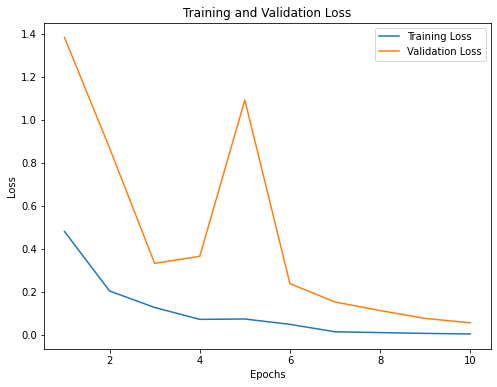

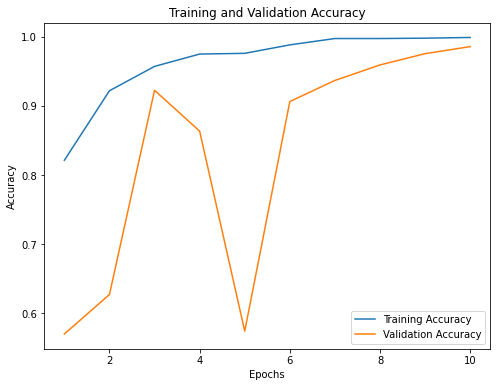

Fold 2
Found 1960 validated image filenames belonging to 3 classes.
train_generator classes {'0': 0, '1': 1, '2': 2}
Found 491 validated image filenames belonging to 3 classes.
val_generator classes {'0': 0, '1': 1, '2': 2}
Epoch 1/10
62/62 [==============================] - 2126s 34s/step - loss: 0.0403 - accuracy: 0.9883 - val_loss: 0.0452 - val_accuracy: 0.9837 - lr: 2.0000e-04
Epoch 2/10
62/62 [==============================] - 1922s 31s/step - loss: 0.0098 - accuracy: 0.9995 - val_loss: 0.0113 - val_accuracy: 0.9959 - lr: 2.0000e-04
Epoch 3/10
62/62 [==============================] - 1904s 31s/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0081 - val_accuracy: 0.9980 - lr: 2.0000e-04
Epoch 4/10
62/62 [==============================] - 2046s 33s/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0061 - val_accuracy: 0.9980 - lr: 2.0000e-04
Epoch 5/10
62/62 [==============================] - 1987s 32s/step - loss: 0.0074 - accuracy: 0.9969 - val_loss: 0.0044 - val_accuracy: 

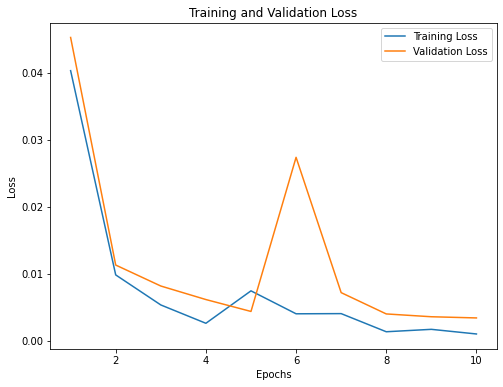

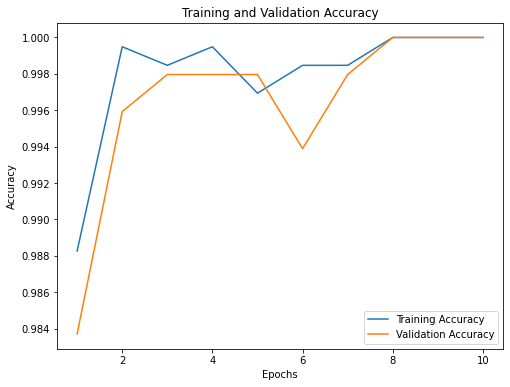

Fold 3
Found 1960 validated image filenames belonging to 3 classes.
train_generator classes {'0': 0, '1': 1, '2': 2}
Found 491 validated image filenames belonging to 3 classes.
val_generator classes {'0': 0, '1': 1, '2': 2}
Epoch 1/10
62/62 [==============================] - 2167s 35s/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 1.5669e-04 - val_accuracy: 1.0000 - lr: 4.0000e-05
Epoch 2/10
62/62 [==============================] - 2209s 36s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.7148e-04 - val_accuracy: 1.0000 - lr: 4.0000e-05
Epoch 3/10
62/62 [==============================] - 2476s 40s/step - loss: 0.0040 - accuracy: 0.9985 - val_loss: 2.7661e-04 - val_accuracy: 1.0000 - lr: 4.0000e-05
Epoch 4/10
62/62 [==============================] - 1992s 32s/step - loss: 0.0021 - accuracy: 0.9990 - val_loss: 2.9055e-04 - val_accuracy: 1.0000 - lr: 8.0000e-06
Training Loss: [0.0028405357152223587, 0.0017021376406773925, 0.0039534480310976505, 0.0021124708000570536]
Validation L

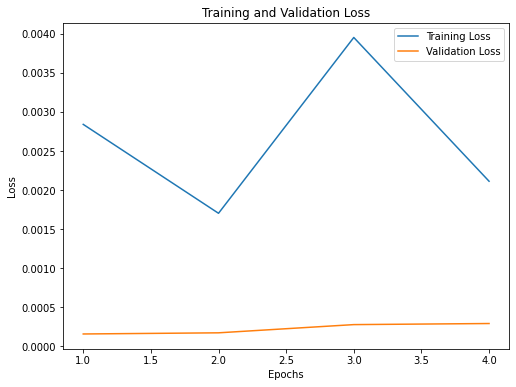

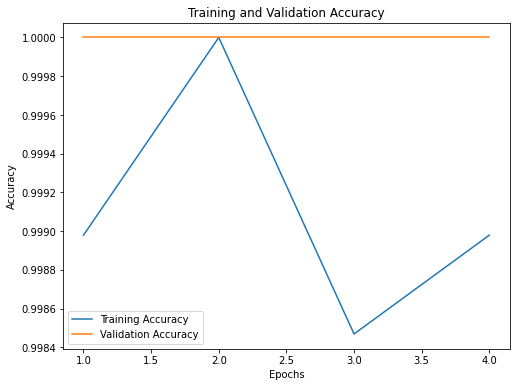

Fold 4
Found 1960 validated image filenames belonging to 3 classes.
train_generator classes {'0': 0, '1': 1, '2': 2}
Found 491 validated image filenames belonging to 3 classes.
val_generator classes {'0': 0, '1': 1, '2': 2}
Epoch 1/10
62/62 [==============================] - 1988s 32s/step - loss: 0.0038 - accuracy: 0.9990 - val_loss: 6.8554e-05 - val_accuracy: 1.0000 - lr: 8.0000e-06
Epoch 2/10
62/62 [==============================] - 2101s 34s/step - loss: 0.0031 - accuracy: 0.9985 - val_loss: 6.8766e-05 - val_accuracy: 1.0000 - lr: 8.0000e-06
Epoch 3/10
62/62 [==============================] - 2336s 38s/step - loss: 0.0043 - accuracy: 0.9990 - val_loss: 8.3518e-05 - val_accuracy: 1.0000 - lr: 8.0000e-06
Epoch 4/10
62/62 [==============================] - 2266s 37s/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 8.4950e-05 - val_accuracy: 1.0000 - lr: 1.6000e-06
Training Loss: [0.0037669711746275425, 0.003115603234618902, 0.004325834568589926, 0.003691516350954771]
Validation Loss

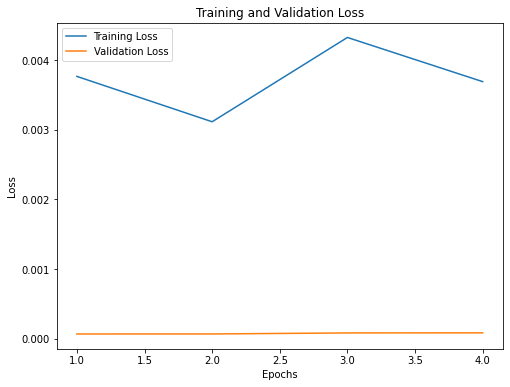

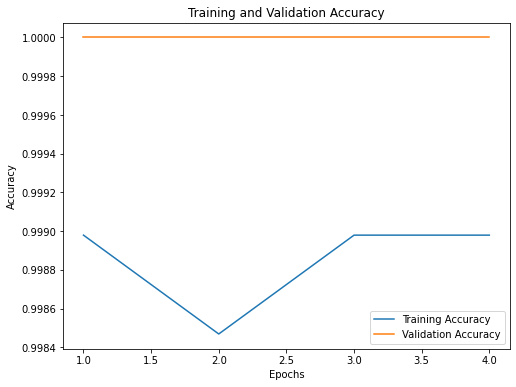

Fold 5
Found 1960 validated image filenames belonging to 3 classes.
train_generator classes {'0': 0, '1': 1, '2': 2}
Found 491 validated image filenames belonging to 3 classes.
val_generator classes {'0': 0, '1': 1, '2': 2}
Epoch 1/10
62/62 [==============================] - 2351s 38s/step - loss: 0.0024 - accuracy: 0.9990 - val_loss: 1.0457e-04 - val_accuracy: 1.0000 - lr: 1.6000e-06
Epoch 2/10
62/62 [==============================] - 2357s 38s/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 1.0387e-04 - val_accuracy: 1.0000 - lr: 1.6000e-06
Epoch 3/10
62/62 [==============================] - 2104s 34s/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 1.0529e-04 - val_accuracy: 1.0000 - lr: 1.6000e-06
Epoch 4/10
62/62 [==============================] - 1553s 25s/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 1.0553e-04 - val_accuracy: 1.0000 - lr: 3.2000e-07
Epoch 5/10
62/62 [==============================] - 1439s 23s/step - loss: 0.0022 - accuracy: 0.9990 - val_loss: 1.0933e

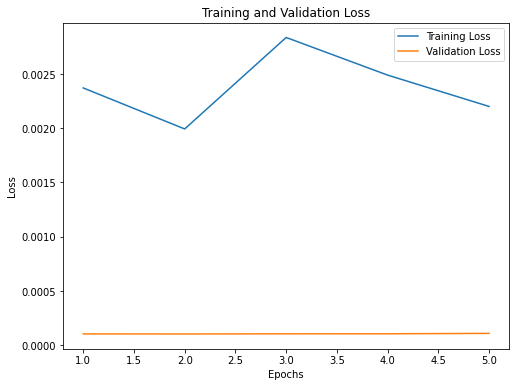

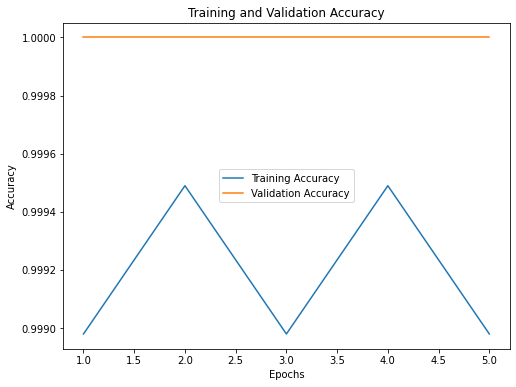

In [13]:
from keras.applications import Xception
from keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define the input shape
input_shape = (224, 224, 3)

# Load the pre-trained Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)
# Add a global average pooling layer, BatchNormalization, and a dense output layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)  # Add BatchNormalization
output = Dense(3, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with a lower learning rate 0.000001
optimizer = Adam(lr=1e-6)  # Lower learning rate for fine-tuning changed to 1e-6 from 1e-4
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Number of epochs and batch size
epochs = 10
batch_size = 32

# Initialize lists to store loss and accuracy values
all_train_loss = []
all_val_loss = []
all_train_acc = []
all_val_acc = []

# Initialize EarlyStopping and ReduceLROnPlateau callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-8)

# Loop through the folds and fit the model
for i in range(5):
    print("Fold", i + 1)
    # Get the current fold's training and validation sets
    fold_train = fold_train_dfs[i]
    fold_val = fold_val_dfs[i]

    

    # Training generator
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=fold_train,
        x_col='image_path',
        y_col='label',
        target_size=(224, 224),  
        batch_size=batch_size,
        seed=42,
        shuffle=True,
        class_mode='sparse'
    )
    print("train_generator classes", train_generator.class_indices)

    # Validation generator
    val_generator = val_datagen.flow_from_dataframe(
        dataframe=fold_val,
        x_col='image_path',
        y_col='label',
        target_size=(224, 224),  
        batch_size=batch_size,
        seed=42,
        shuffle=True,
        class_mode='sparse'
    )
    print("val_generator classes", val_generator.class_indices)

    # Fit the model on the current fold's training and validation data
    history = model.fit(
        train_generator,
        epochs=epochs,
        verbose=1,
        validation_data=val_generator,
        callbacks=[early_stop, reduce_lr]  # Add callbacks
    )

    # Print the training and validation loss and accuracy
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    print("Training Loss:", train_loss)
    print("Validation Loss:", val_loss)
    print("Training Accuracy:", train_acc)
    print("Validation Accuracy:", val_acc)

    # Append the loss and accuracy values to the lists
    all_train_loss.append(train_loss)
    all_val_loss.append(val_loss)
    all_train_acc.append(train_acc)
    all_val_acc.append(val_acc)

    # Plot the training and validation loss
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(history.epoch) + 1), train_loss, label='Training Loss')
    plt.plot(range(1, len(history.epoch) + 1), val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    # Plot the training and validation accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(history.epoch) + 1), train_acc, label='Training Accuracy')
    plt.plot(range(1, len(history.epoch) + 1), val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [14]:
# Calculate and print the average loss and accuracy
avg_train_loss = [sum(epoch_loss) / len(epoch_loss) for epoch_loss in all_train_loss]
avg_val_loss = [sum(epoch_loss) / len(epoch_loss) for epoch_loss in all_val_loss]
avg_train_acc = [sum(epoch_acc) / len(epoch_acc) for epoch_acc in all_train_acc]
avg_val_acc = [sum(epoch_acc) / len(epoch_acc) for epoch_acc in all_val_acc]

print("Average Training Loss:", avg_train_loss)
print("Average Validation Loss:", avg_val_loss)
print("Average Training Accuracy:", avg_train_acc)
print("Average Validation Accuracy:", avg_val_acc)


Average Training Loss: [0.10443231663666666, 0.007746753026731312, 0.002652148046763614, 0.0037249813321977854, 0.002378348773345351]
Average Validation Loss: [0.4680075738579035, 0.012060318794101476, 0.00022383084069588222, 7.644721881661098e-05, 0.0001057189831044525]
Average Training Accuracy: [0.9631632685661315, 0.997959190607071, 0.9991071373224258, 0.9988520294427872, 0.9991836547851562]
Average Validation Accuracy: [0.8321792304515838, 0.9965376913547516, 1.0, 1.0, 1.0]


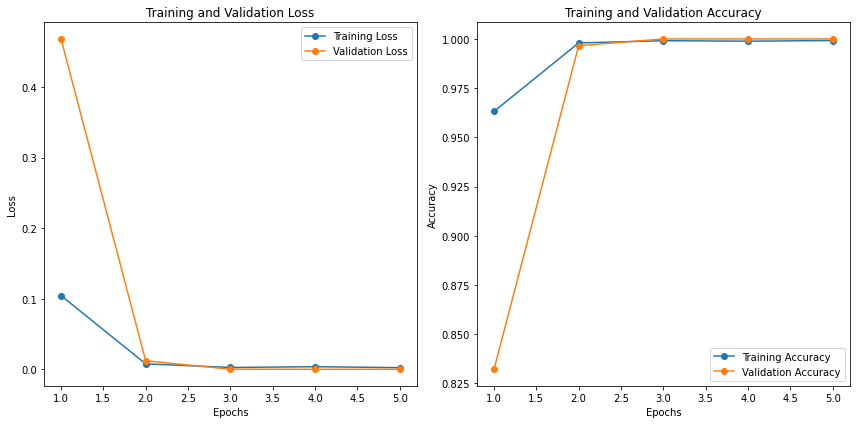

In [29]:
import matplotlib.pyplot as plt

# Data
training_loss = [0.10443231663666666, 0.007746753026731312, 0.002652148046763614, 0.0037249813321977854, 0.002378348773345351]
validation_loss = [0.4680075738579035, 0.012060318794101476, 0.00022383084069588222, 7.644721881661098e-05, 0.0001057189831044525]
training_accuracy = [0.9631632685661315, 0.997959190607071, 0.9991071373224258, 0.9988520294427872, 0.9991836547851562]
validation_accuracy = [0.8321792304515838, 0.9965376913547516, 1.0, 1.0, 1.0]

# X-axis values (epochs)
epochs = list(range(1, len(training_loss) + 1))

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

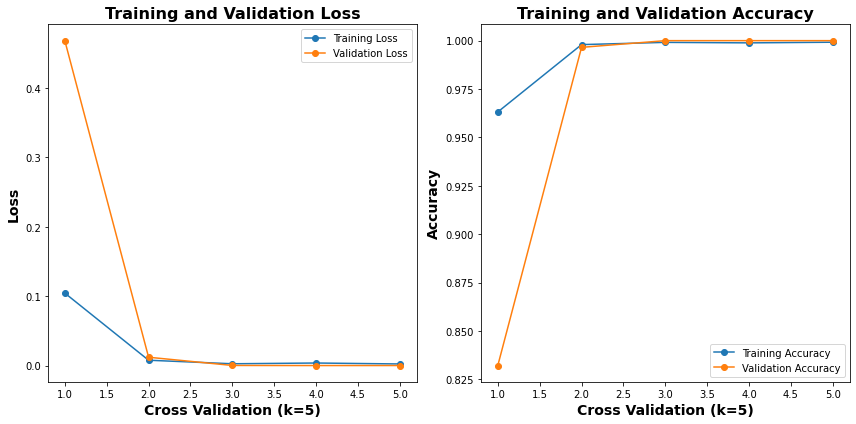

In [37]:
import matplotlib.pyplot as plt

# Data
training_loss = [0.10443231663666666, 0.007746753026731312, 0.002652148046763614, 0.0037249813321977854, 0.002378348773345351]
validation_loss = [0.4680075738579035, 0.012060318794101476, 0.00022383084069588222, 7.644721881661098e-05, 0.0001057189831044525]
training_accuracy = [0.9631632685661315, 0.997959190607071, 0.9991071373224258, 0.9988520294427872, 0.9991836547851562]
validation_accuracy = [0.8321792304515838, 0.9965376913547516, 1.0, 1.0, 1.0]

# X-axis values (Cross Validation Runs, each CV executed for 10 epochs)
cross_validation_runs = list(range(1, len(training_loss) + 1))

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(cross_validation_runs, training_loss, label='Training Loss', marker='o')
plt.plot(cross_validation_runs, validation_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss', fontsize=16, weight='bold')
plt.xlabel('Cross Validation (k=5)', fontsize=14, weight='bold')
plt.ylabel('Loss', fontsize=14, weight='bold')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(cross_validation_runs, training_accuracy, label='Training Accuracy', marker='o')
plt.plot(cross_validation_runs, validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy', fontsize=16, weight='bold')
plt.xlabel('Cross Validation (k=5)', fontsize=14, weight='bold')
plt.ylabel('Accuracy', fontsize=14, weight='bold')
plt.legend()

# Add space between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.tight_layout()
plt.show()

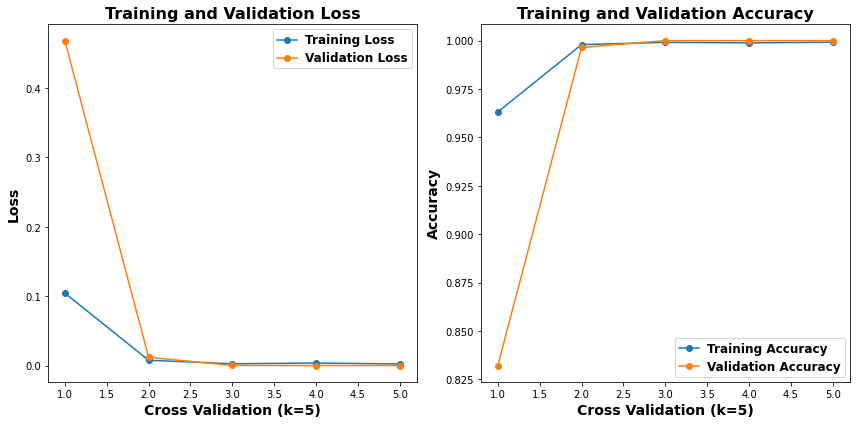

In [38]:
from matplotlib.font_manager import FontProperties

# Data
training_loss = [0.10443231663666666, 0.007746753026731312, 0.002652148046763614, 0.0037249813321977854, 0.002378348773345351]
validation_loss = [0.4680075738579035, 0.012060318794101476, 0.00022383084069588222, 7.644721881661098e-05, 0.0001057189831044525]
training_accuracy = [0.9631632685661315, 0.997959190607071, 0.9991071373224258, 0.9988520294427872, 0.9991836547851562]
validation_accuracy = [0.8321792304515838, 0.9965376913547516, 1.0, 1.0, 1.0]

# X-axis values (Cross Validation Runs, each CV executed for 10 epochs)
cross_validation_runs = list(range(1, len(training_loss) + 1))

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(cross_validation_runs, training_loss, label='Training Loss', marker='o')
plt.plot(cross_validation_runs, validation_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss', fontsize=16, weight='bold')
plt.xlabel('Cross Validation (k=5)', fontsize=14, weight='bold')
plt.ylabel('Loss', fontsize=14, weight='bold')
legend = plt.legend()
for label in legend.get_texts():
    label.set_fontsize(12)  # Adjust the legend font size
    label.set_weight('bold')  # Make the legend text bold

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(cross_validation_runs, training_accuracy, label='Training Accuracy', marker='o')
plt.plot(cross_validation_runs, validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy', fontsize=16, weight='bold')
plt.xlabel('Cross Validation (k=5)', fontsize=14, weight='bold')
plt.ylabel('Accuracy', fontsize=14, weight='bold')
legend = plt.legend()
for label in legend.get_texts():
    label.set_fontsize(12)  # Adjust the legend font size
    label.set_weight('bold')  # Make the legend text bold

# Add space between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.tight_layout()
plt.show()

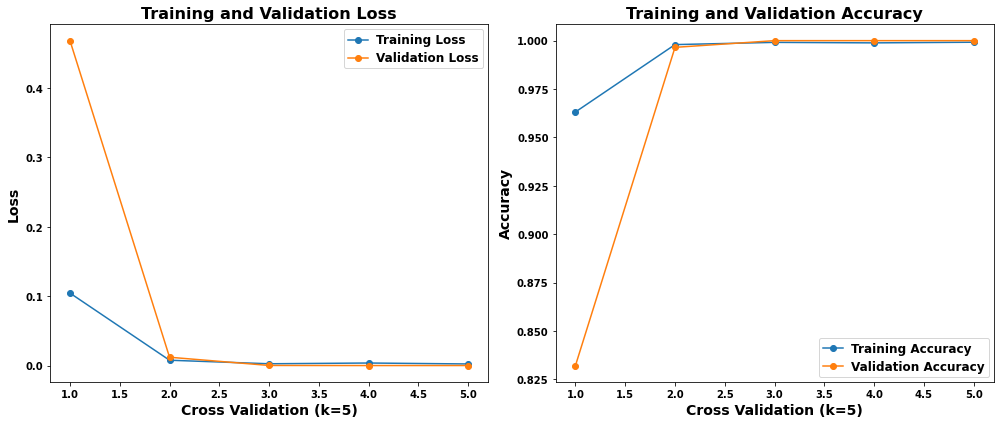

In [40]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Data
training_loss = [0.10443231663666666, 0.007746753026731312, 0.002652148046763614, 0.0037249813321977854, 0.002378348773345351]
validation_loss = [0.4680075738579035, 0.012060318794101476, 0.00022383084069588222, 7.644721881661098e-05, 0.0001057189831044525]
training_accuracy = [0.9631632685661315, 0.997959190607071, 0.9991071373224258, 0.9988520294427872, 0.9991836547851562]
validation_accuracy = [0.8321792304515838, 0.9965376913547516, 1.0, 1.0, 1.0]

# X-axis values (Cross Validation Runs, each CV executed for 10 epochs)
cross_validation_runs = list(range(1, len(training_loss) + 1))

# Create subplots for loss and accuracy
plt.figure(figsize=(14, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(cross_validation_runs, training_loss, label='Training Loss', marker='o')
plt.plot(cross_validation_runs, validation_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss', fontsize=16, weight='bold')
plt.xlabel('Cross Validation (k=5)', fontsize=14, weight='bold')
plt.ylabel('Loss', fontsize=14, weight='bold')
legend = plt.legend()
for label in legend.get_texts():
    label.set_fontsize(12)  # Adjust the legend font size
    label.set_weight('bold')  # Make the legend text bold

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(cross_validation_runs, training_accuracy, label='Training Accuracy', marker='o')
plt.plot(cross_validation_runs, validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy', fontsize=16, weight='bold')
plt.xlabel('Cross Validation (k=5)', fontsize=14, weight='bold')
plt.ylabel('Accuracy', fontsize=14, weight='bold')
legend = plt.legend()
for label in legend.get_texts():
    label.set_fontsize(12)  # Adjust the legend font size
    label.set_weight('bold')  # Make the legend text bold

# Add space between subplots
plt.subplots_adjust(wspace=0.5)

# Increase font size of X and Y labels and make them bold
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(10)  # Adjust the tick label font size
        label.set_weight('bold')  # Make the tick label text bold

# Show the plot
plt.tight_layout()
plt.show()

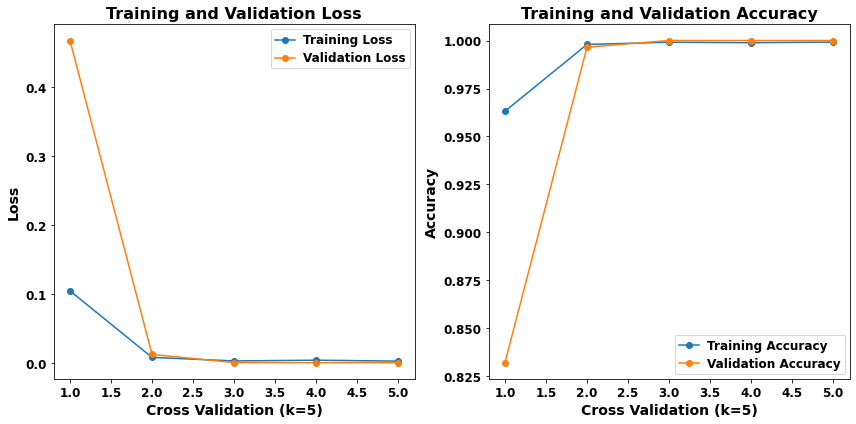

In [41]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Data
training_loss = [0.10443231663666666, 0.007746753026731312, 0.002652148046763614, 0.0037249813321977854, 0.002378348773345351]
validation_loss = [0.4680075738579035, 0.012060318794101476, 0.00022383084069588222, 7.644721881661098e-05, 0.0001057189831044525]
training_accuracy = [0.9631632685661315, 0.997959190607071, 0.9991071373224258, 0.9988520294427872, 0.9991836547851562]
validation_accuracy = [0.8321792304515838, 0.9965376913547516, 1.0, 1.0, 1.0]

# X-axis values (Cross Validation Runs, each CV executed for 10 epochs)
cross_validation_runs = list(range(1, len(training_loss) + 1))

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(cross_validation_runs, training_loss, label='Training Loss', marker='o')
plt.plot(cross_validation_runs, validation_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss', fontsize=16, weight='bold')
plt.xlabel('Cross Validation (k=5)', fontsize=14, weight='bold')
plt.ylabel('Loss', fontsize=14, weight='bold')
legend = plt.legend()
for label in legend.get_texts():
    label.set_fontsize(12)  # Adjust the legend font size
    label.set_weight('bold')  # Make the legend text bold

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(cross_validation_runs, training_accuracy, label='Training Accuracy', marker='o')
plt.plot(cross_validation_runs, validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy', fontsize=16, weight='bold')
plt.xlabel('Cross Validation (k=5)', fontsize=14, weight='bold')
plt.ylabel('Accuracy', fontsize=14, weight='bold')
legend = plt.legend()
for label in legend.get_texts():
    label.set_fontsize(12)  # Adjust the legend font size
    label.set_weight('bold')  # Make the legend text bold

# Add space between subplots
plt.subplots_adjust(wspace=0.4)

# Increase font size of X and Y labels and make them bold
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(12)  # Adjust the tick label font size
        label.set_weight('bold')  # Make the tick label text bold

# Save the image to your system
plt.savefig('Training and Validation.png', dpi=300)  # Adjust the file format and resolution as needed

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
# Calculate and print the average loss and accuracy
mean_train_loss = sum(avg_train_loss) / len(avg_train_loss)
mean_val_loss = sum(avg_val_loss) / len(avg_val_loss)
mean_train_acc = sum(avg_train_acc) / len(avg_train_acc)
mean_val_acc = sum(avg_val_acc) / len(avg_val_acc)

print("Mean Training Loss:", mean_train_loss)
print("Mean Validation Loss:", mean_val_loss)
print("Mean Training Accuracy:", mean_train_acc)
print("Mean Validation Accuracy:", mean_val_acc)

Mean Training Loss: 0.024186909563140943
Mean Validation Loss: 0.09609477793892438
Mean Training Accuracy: 0.9916530561447143
Mean Validation Accuracy: 0.965743384361267


In [16]:
# Evaluate the model on the evaluation set
evaluation_generator = test_datagen.flow_from_dataframe(
    dataframe=evaluation_set,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    seed=1234,
    shuffle=False,
    class_mode='sparse'
)
print("evaluation_generator classes", evaluation_generator.class_indices)

evaluation_loss, evaluation_accuracy = model.evaluate(evaluation_generator)

print("Evaluation Loss:", evaluation_loss)
print("Evaluation Accuracy:", evaluation_accuracy)

Found 613 validated image filenames belonging to 3 classes.
evaluation_generator classes {'0': 0, '1': 1, '2': 2}
20/20 [==============================] - 81s 4s/step - loss: 0.0542 - accuracy: 0.9918
Evaluation Loss: 0.05417419597506523
Evaluation Accuracy: 0.9918434023857117


## Evaluation Accuracy: 0.9918434023857117

In [33]:
# After training, save the model
model.save('Xception+B+E+R+CLL_in_optimizer.h5')
print("Model saved successfully")

/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully


In [35]:
# After training, save the model
model.save('Xception + B+ES+R+change learninng Rate_and_optimizer.h5')
print("Model saved successfully")

/Users/shyamsonu/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully


20/20 [==============================] - 83s 4s/step


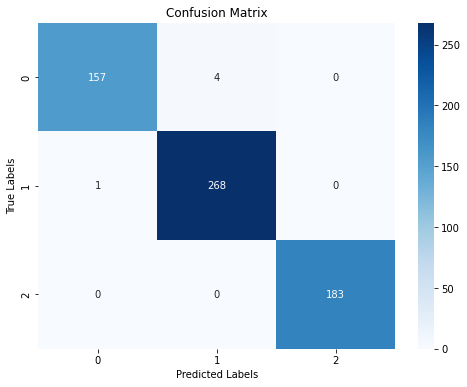

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       161
           1       0.99      1.00      0.99       269
           2       1.00      1.00      1.00       183

    accuracy                           0.99       613
   macro avg       0.99      0.99      0.99       613
weighted avg       0.99      0.99      0.99       613



In [19]:
#metrics
from sklearn.metrics import confusion_matrix, classification_report

# Get the predicted labels
y_pred = model.predict(evaluation_generator).argmax(axis=1)

# Get the true labels
y_true = evaluation_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class labels
class_labels = list(evaluation_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

In [20]:
y_pred = model.predict(evaluation_generator).argmax(axis=1)

# Get the true labels
y_true = evaluation_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm

20/20 [==============================] - 80s 4s/step


array([[157,   4,   0],
       [  1, 268,   0],
       [  0,   0, 183]])

In [21]:
# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) from the confusion matrix
TP = cm.diagonal()
TN = np.sum(cm) - (np.sum(cm, axis=0) + np.sum(cm, axis=1) - TP)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP

# Print the results for each class
for i, class_label in enumerate(class_labels):
    print(f"Class: {class_label}")
    print(f"True Positives (TP): {TP[i]}")
    print(f"True Negatives (TN): {TN[i]}")
    print(f"False Positives (FP): {FP[i]}")
    print(f"False Negatives (FN): {FN[i]}")
    print("="*20)

Class: 0
True Positives (TP): 157
True Negatives (TN): 451
False Positives (FP): 1
False Negatives (FN): 4
Class: 1
True Positives (TP): 268
True Negatives (TN): 340
False Positives (FP): 4
False Negatives (FN): 1
Class: 2
True Positives (TP): 183
True Negatives (TN): 430
False Positives (FP): 0
False Negatives (FN): 0


In [22]:
# Calculate Precision, Recall, Specificity, and F1-score for each class
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results for each class
for i, class_label in enumerate(class_labels):
    print(f"Class: {class_label}")
    print(f"Precision: {precision[i]:.4f}")
    print(f"Recall: {recall[i]:.4f}")
    print(f"Specificity: {specificity[i]:.4f}")
    print(f"F1-score: {f1_score[i]:.4f}")
    print("="*20)

Class: 0
Precision: 0.9937
Recall: 0.9752
Specificity: 0.9978
F1-score: 0.9843
Class: 1
Precision: 0.9853
Recall: 0.9963
Specificity: 0.9884
F1-score: 0.9908
Class: 2
Precision: 1.0000
Recall: 1.0000
Specificity: 1.0000
F1-score: 1.0000


20/20 [==============================] - 82s 4s/step


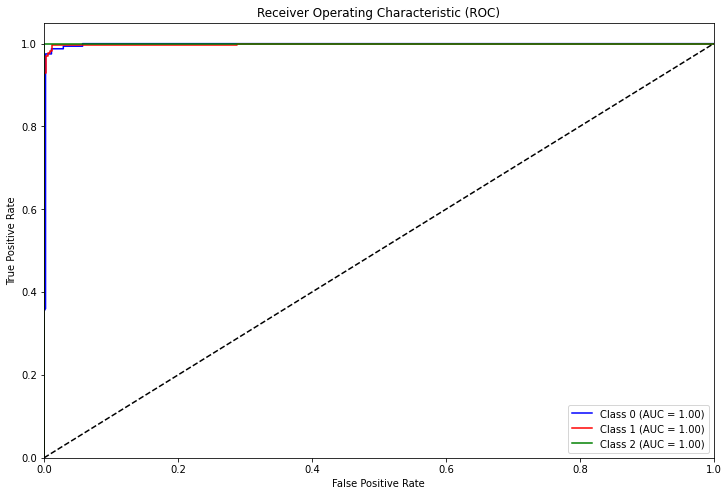

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Get the predicted probabilities for the evaluation set (replace with your actual evaluation data)
y_pred_prob = model.predict(evaluation_generator)  

# Convert the true labels to binary format
y_true = label_binarize(evaluation_generator.classes, classes=[0, 1, 2])  

# Compute the false positive rate, true positive rate, and classification thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Replace '3' with the number of classes in your problem
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(12,8))
colors = ['blue', 'red', 'green']  # Adjust colors based on the number of classes
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

20/20 [==============================] - 82s 4s/step


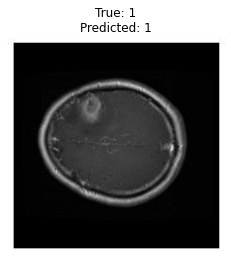

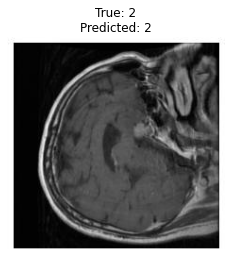

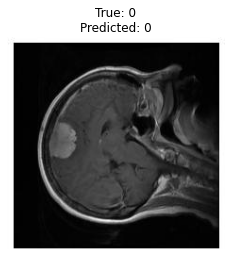

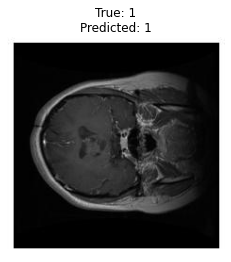

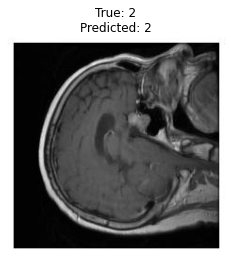

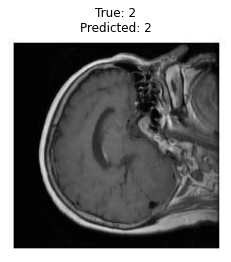

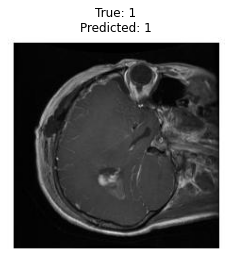

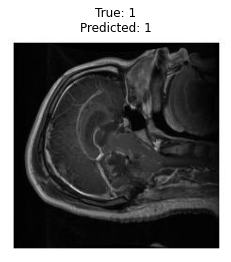

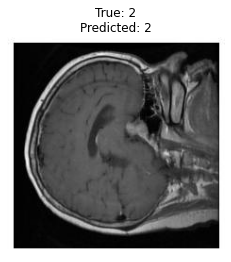

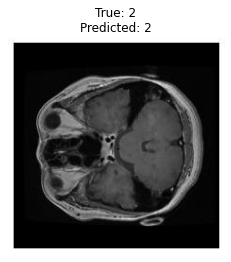

In [24]:
#predictions on test set

# Get the class labels
class_labels = train_generator.class_indices

# Generate predictions on the test set
predictions = model.predict(evaluation_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Retrieve the filenames and true labels from the test set
filenames = evaluation_generator.filenames
true_labels = evaluation_generator.classes

# Select 3 random indices from the test set
random_indices = np.random.choice(len(filenames), 10, replace=False)

# Iterate over the selected images
for i in random_indices:
    img = plt.imread(filenames[i])
    true_label = list(class_labels.keys())[list(class_labels.values()).index(true_labels[i])]
    predicted_label = list(class_labels.keys())[list(class_labels.values()).index(predicted_labels[i])]

    plt.imshow(img)
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')
    plt.show()

In [25]:
# Initialize counters for correct and incorrect predictions
correct_predictions = 0
incorrect_predictions = 0

# Iterate over all predictions
for i in range(len(filenames)):
    true_label = list(class_labels.keys())[list(class_labels.values()).index(true_labels[i])]
    predicted_label = list(class_labels.keys())[list(class_labels.values()).index(predicted_labels[i])]
    
    # Check if the prediction is correct
    if true_label == predicted_label:
        correct_predictions += 1
    else:
        incorrect_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / (correct_predictions + incorrect_predictions)

# Print the results
print("Correct Predictions:", correct_predictions)
print("Incorrect Predictions:", incorrect_predictions)
print("Accuracy:", accuracy)

Correct Predictions: 608
Incorrect Predictions: 5
Accuracy: 0.9918433931484503


1/1 [==============================] - 3s 3s/step


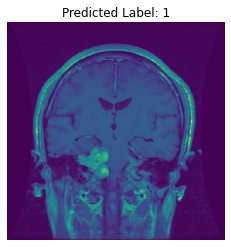

In [26]:
#Prediction for unknown image
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input

# Load and preprocess the image
image_path = '/Users/shyamsonu/Downloads/Brain Tumor/01 Brain Tumor/1/2300.png'  #meningioma
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the trained model
predictions = model.predict(x)
predicted_label_index = np.argmax(predictions)
predicted_label = list(class_labels.keys())[predicted_label_index]

# Display the image and predicted label
plt.imshow(img)
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()
 
#incorrect Prediction

1/1 [==============================] - 0s 258ms/step


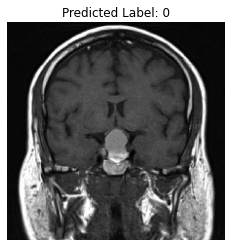

In [27]:
# Load and preprocess the image
image_path = '/Users/shyamsonu/Downloads/Pituitary.jpg'  
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the trained model
predictions = model.predict(x)
predicted_label_index = np.argmax(predictions)
predicted_label = list(class_labels.keys())[predicted_label_index]

# Display the image and predicted label
plt.imshow(img)
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()
#predicted incorrect

1/1 [==============================] - 0s 196ms/step


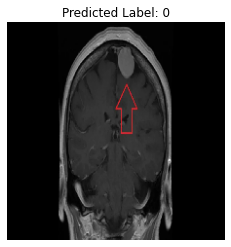

In [28]:
image_path = '/Users/shyamsonu/Downloads/Meningioma.jpg'  
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the trained model
predictions = model.predict(x)
predicted_label_index = np.argmax(predictions)
predicted_label = list(class_labels.keys())[predicted_label_index]

# Display the image and predicted label
plt.imshow(img)
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()
#predicted incorrect

1/1 [==============================] - 0s 216ms/step


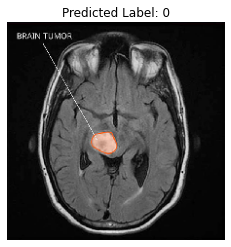

In [29]:
image_path = '/Users/shyamsonu/Downloads/Glioma.jpg'  
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the trained model
predictions = model.predict(x)
predicted_label_index = np.argmax(predictions)
predicted_label = list(class_labels.keys())[predicted_label_index]

# Display the image and predicted label
plt.imshow(img)
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()
#predicted incorrect

1/1 [==============================] - 0s 298ms/step


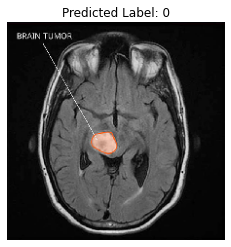

In [30]:
image_path = '/Users/shyamsonu/Downloads/Glioma.jpg'  
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the trained model
predictions = model.predict(x)
predicted_label_index = np.argmax(predictions)
predicted_label = list(class_labels.keys())[predicted_label_index]

# Display the image and predicted label
plt.imshow(img)
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()
#predicted incorrect

1/1 [==============================] - 0s 232ms/step


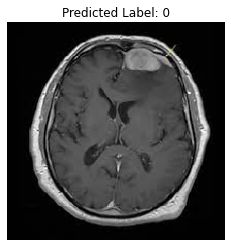

In [31]:
image_path = '/Users/shyamsonu/Downloads/M1.jpg'  
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the trained model
predictions = model.predict(x)
predicted_label_index = np.argmax(predictions)
predicted_label = list(class_labels.keys())[predicted_label_index]

# Display the image and predicted label
plt.imshow(img)
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()
#predicted correct

In [34]:
from keras.models import load_model

# Load the saved model
saved_model = load_model('Xception+B+E+R+CLL_in_optimizer.h5')
# Evaluate the model on the evaluation set
evaluation_generator = test_datagen.flow_from_dataframe(
    dataframe=evaluation_set,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    seed=1234,
    shuffle=False,
    class_mode='sparse'
)

evaluation_loss, evaluation_accuracy = saved_model.evaluate(evaluation_generator)
print("Evaluation Loss:", evaluation_loss)
print("Evaluation Accuracy:", evaluation_accuracy)

Found 613 validated image filenames belonging to 3 classes.
20/20 [==============================] - 50s 2s/step - loss: 0.0542 - accuracy: 0.9918
Evaluation Loss: 0.05417419597506523
Evaluation Accuracy: 0.9918434023857117


In [ ]:
#Xception + B+ES+R+change learninng Rate_and_optimizer.h5

In [36]:
from keras.models import load_model

# Load the saved model
saved_model = load_model('Xception + B+ES+R+change learninng Rate_and_optimizer.h5')
# Evaluate the model on the evaluation set
evaluation_generator = test_datagen.flow_from_dataframe(
    dataframe=evaluation_set,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    seed=1234,
    shuffle=False,
    class_mode='sparse'
)

evaluation_loss, evaluation_accuracy = saved_model.evaluate(evaluation_generator)
print("Evaluation Loss:", evaluation_loss)
print("Evaluation Accuracy:", evaluation_accuracy)

Found 613 validated image filenames belonging to 3 classes.
20/20 [==============================] - 52s 3s/step - loss: 0.0542 - accuracy: 0.9918
Evaluation Loss: 0.05417419597506523
Evaluation Accuracy: 0.9918434023857117


Found 613 validated image filenames belonging to 3 classes.
20/20 [==============================] - 162s 8s/step


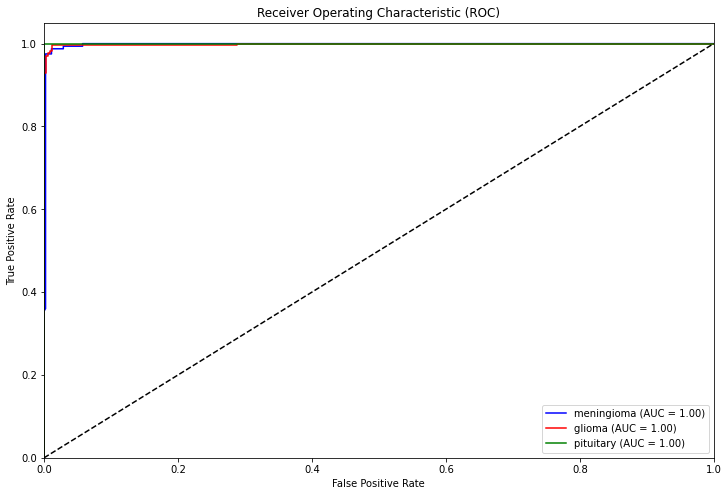

In [17]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model  # Import the load_model function from Keras

# Load the saved model
saved_model = load_model('Xception + B+ES+R+change learninng Rate_and_optimizer.h5')
evaluation_generator = test_datagen.flow_from_dataframe(
    dataframe=evaluation_set,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    seed=1234,
    shuffle=False,
    class_mode='sparse'
)

# Get the predicted probabilities for the evaluation set
y_pred_prob = saved_model.predict(evaluation_generator)

# Convert the true labels to binary format
# Replace class numbers with class labels
class_labels = ['meningioma', 'glioma', 'pituitary']
y_true = label_binarize(evaluation_generator.classes, classes=[0, 1, 2])

# Compute the false positive rate, true positive rate, and classification thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Replace '3' with the number of classes in your problem
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(12, 8))
colors = ['blue', 'red', 'green']  # Adjust colors based on the number of classes
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'{class_labels[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

plt.show()

Found 613 validated image filenames belonging to 3 classes.
20/20 [==============================] - 154s 7s/step


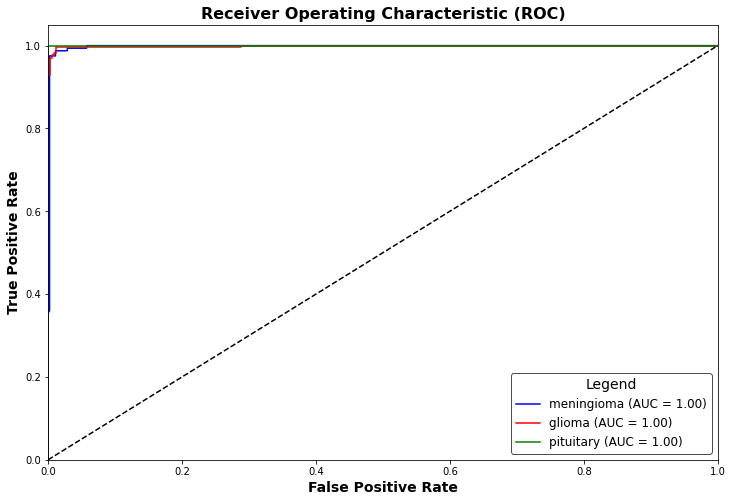

In [20]:
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model  # Import the load_model function from Keras

# Load the saved model
saved_model = load_model('Xception + B+ES+R+change learninng Rate_and_optimizer.h5')
evaluation_generator = test_datagen.flow_from_dataframe(
    dataframe=evaluation_set,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    seed=1234,
    shuffle=False,
    class_mode='sparse'
)

# Get the predicted probabilities for the evaluation set
y_pred_prob = saved_model.predict(evaluation_generator)

# Convert the true labels to binary format
# Replace class numbers with class labels
class_labels = ['meningioma', 'glioma', 'pituitary']
y_true = label_binarize(evaluation_generator.classes, classes=[0, 1, 2])

# Compute the false positive rate, true positive rate, and classification thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Replace '3' with the number of classes in your problem
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(12, 8))
colors = ['blue', 'red', 'green']  # Adjust colors based on the number of classes
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'{class_labels[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# Increase text size and make it bold
plt.xlabel('False Positive Rate', fontsize=14, weight='bold')
plt.ylabel('True Positive Rate', fontsize=14, weight='bold')
plt.title('Receiver Operating Characteristic (ROC)', fontsize=16, weight='bold')

plt.legend(loc='lower right', fontsize=12, title_fontsize=14, title='Legend', fancybox=True, framealpha=0.7, edgecolor='black')
plt.show()

Found 613 validated image filenames belonging to 3 classes.
20/20 [==============================] - 140s 7s/step


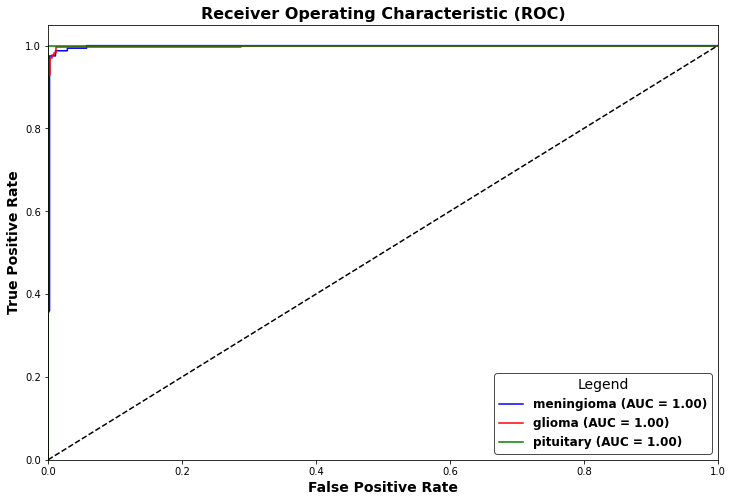

In [28]:
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model  # Import the load_model function from Keras

# Load the saved model
saved_model = load_model('Xception + B+ES+R+change learninng Rate_and_optimizer.h5')
evaluation_generator = test_datagen.flow_from_dataframe(
    dataframe=evaluation_set,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    seed=1234,
    shuffle=False,
    class_mode='sparse'
)

# Get the predicted probabilities for the evaluation set
y_pred_prob = saved_model.predict(evaluation_generator)

# Convert the true labels to binary format
# Replace class numbers with class labels
class_labels = ['meningioma', 'glioma', 'pituitary']
y_true = label_binarize(evaluation_generator.classes, classes=[0, 1, 2])

# Compute the false positive rate, true positive rate, and classification thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Replace '3' with the number of classes in your problem
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(12, 8))
colors = ['blue', 'red', 'green']  # Adjust colors based on the number of classes
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'{class_labels[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Increase text size and make it bold
plt.xlabel('False Positive Rate', fontsize=14, weight='bold')
plt.ylabel('True Positive Rate', fontsize=14, weight='bold')
plt.title('Receiver Operating Characteristic (ROC)', fontsize=16, weight='bold')

# Make text inside legend bold, increase legend box size
legend = plt.legend(loc='lower right', fontsize=12, title_fontsize=14, title='Legend', fancybox=True, framealpha=0.7, edgecolor='black')
for text in legend.get_texts():
    text.set_weight('bold')

plt.show()

In [ ]:
# from tensorflow.keras.models import load_model
# # Load and preprocess the image

# image_path = '/Users/shyamsonu/Downloads/Pituitary.jpg'  
# img = image.load_img(image_path, target_size=(224, 224))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)

# # Make predictions using the trained model
# predictions = model.predict(x)
# predicted_label_index = np.argmax(predictions)
# predicted_label = list(class_labels.keys())[predicted_label_index]

# # Display the image and predicted label
# plt.imshow(img)
# plt.title(f"Predicted Label: {predicted_label}")
# plt.axis('off')
# plt.show()
# #predicted incorrect